## 숫자예측 모델(LSTM)

In [26]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [27]:
# 1. 데이터 생성 (랜덤 숫자 시퀀스)
data = np.array([i for i in range(1, 21)]) # 1부터 20까지의 숫자
timesteps = 3 # 타임스텝 길이

In [28]:
x_data = []
y_data = []

In [30]:
# 타임스텝에 따라 입력 데이터와 출력 데이터 생성
for i in range(len(data) - timesteps):
    x_data.append(data[i:i+timesteps]) # 입력(3개의 숫자)
    y_data.append(data[i+timesteps]) # 출력(다음 숫자)
    
x_data = np.array(x_data).reshape(-1, timesteps, 1) # 샘플 수, 타임스텝, 피처 수
y_data = np.array(y_data) # 출력값

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [31]:
# 2. LSTM 모델 정의
model = Sequential([
    LSTM(10, input_shape=(timesteps, 1)), # LSTM 레이어(유닛:10)
    Dense(1) # 출력 레이어
])

In [32]:
model.compile(optimizer='adam', loss='mse')

In [33]:
# 3. 모델 학습
model.fit(x_data, y_data, epochs=2000, verbose=1) # 100번 반복 학습

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 153.7017
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 153.2785
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 152.8530
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 152.4254
Epoch 5/2000
1/1 [==============================] - 0s 0s/step - loss: 151.9958
Epoch 6/2000
1/1 [==============================] - 0s 14ms/step - loss: 151.5647
Epoch 7/2000
1/1 [==============================] - 0s 310us/step - loss: 151.1323
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 150.6987
Epoch 9/2000
1/1 [==============================] - 0s 0s/step - loss: 150.2643
Epoch 10/2000
1/1 [==============================] - 0s 0s/step - loss: 149.8293
Epoch 11/2000
1/1 [==============================] - 0s 16ms/step - loss: 149.3940
Epoch 12/2000
1/1 [==============================] - 0s 0s/step - loss: 148.9587
Epoch 13/2000
1/1 [======

In [34]:
# 4. 예측 테스트
test_input = np.array([18, 19, 20]).reshape(1, timesteps, 1) # 입력 예시
predicted_value = model.predict(test_input)

In [37]:
# 결과 출력
print("입력 데이터:", test_input.flatten()) # flatten함수: [[1,2],[3,4]] --> [1,2,3,4]
print("예측 값:", predicted_value[0][0])

입력 데이터: [18 19 20]
예측 값: 16.404243


## 기온예측 모델(RNN)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [41]:
# 1. 데이터 로드
file_path = "dataset/jena_climate_2009.csv"
data = pd.read_csv(file_path)
# 데이터 확인
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [42]:
# 'T (degC)' 열이 기온 데이터
temperature = data['T (degC)'].values

In [45]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1)) #졍규화
scaled_data = scaler.fit_transform(temperature.reshape(-1,1))

In [46]:
# 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [] , []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back,0])
    return np.array(X), np.array(y)

In [47]:
look_back = 60 # 과거 60시간 데이터를 기반으로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # RNN입력 형태

In [48]:
# 데이터 분리
train_size = int(len(X)*0.8) # 80% 학습 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [50]:
# 3. RNN 모델 구성
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
# 4. 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
543/543 [==============================] - 4s 8ms/step - loss: 3.9060e-05 - val_loss: 4.4256e-05
Epoch 2/10
543/543 [==============================] - 4s 7ms/step - loss: 3.5622e-05 - val_loss: 4.6713e-05
Epoch 3/10
543/543 [==============================] - 4s 7ms/step - loss: 3.4593e-05 - val_loss: 1.1743e-04
Epoch 4/10
543/543 [==============================] - 4s 7ms/step - loss: 3.1059e-05 - val_loss: 3.6679e-05
Epoch 5/10
543/543 [==============================] - 4s 7ms/step - loss: 3.0967e-05 - val_loss: 6.8442e-05
Epoch 6/10
543/543 [==============================] - 4s 7ms/step - loss: 2.8816e-05 - val_loss: 4.1829e-05
Epoch 7/10
543/543 [==============================] - 4s 8ms/step - loss: 2.8676e-05 - val_loss: 1.7957e-04
Epoch 8/10
543/543 [==============================] - 4s 7ms/step - loss: 2.7082e-05 - val_loss: 5.5492e-05
Epoch 9/10
543/543 [==============================] - 4s 8ms/step - loss: 2.4748e-05 - val_loss: 4.0418e-05
Epoch 10/10
543/543 [=======

In [60]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # 정규화 복원

In [61]:
# 실제 값 복원
actual_values = scaler.inverse_transform(y_test.reshape(-1,1))

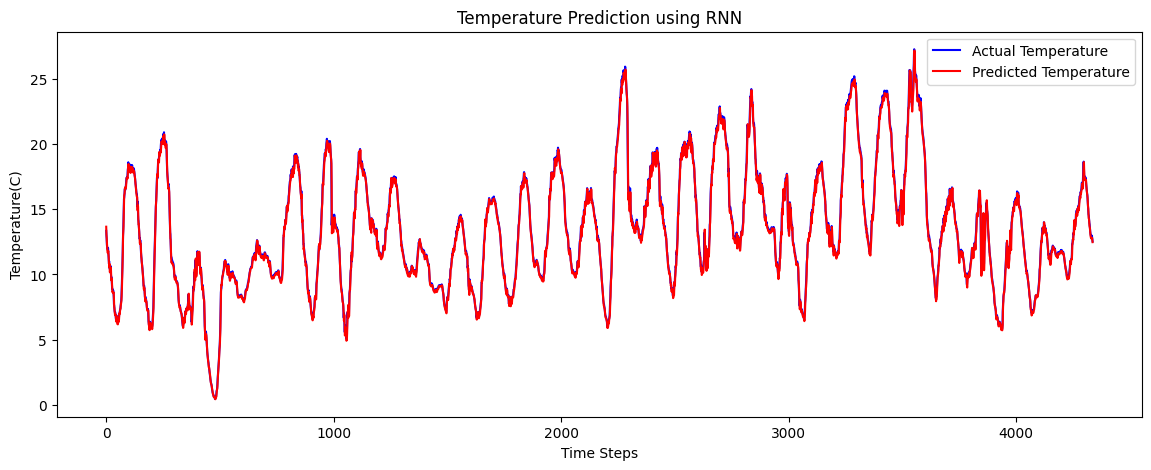

In [62]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_values, label="Actual Temperature", color='blue')
plt.plot(predictions, label='Predicted Temperature', color='red')
plt.title('Temperature Prediction using RNN')
plt.xlabel('Time Steps')
plt.ylabel('Temperature(C)')
plt.legend()
plt.show()

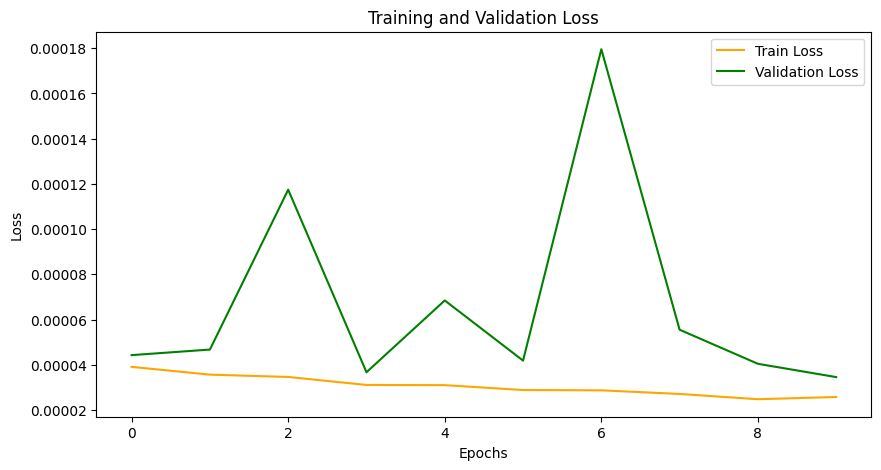

In [63]:
# 7. 학습 손실 시각화
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 주가예측 모델(LSTM)

In [65]:
# 증권데이터 수집 라이브러리 설치 :  pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [66]:
# 1. 데이터 수집
ticker = "AAPL" # 예: 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']] # 종가만 사용

[*********************100%***********************]  1 of 1 completed


In [67]:
data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02,24.347170
2015-01-05,23.661274
2015-01-06,23.663500
2015-01-07,23.995317
2015-01-08,24.917269


In [68]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [69]:
def create_dataset(dataset, look_back=60):
    X, y = [],[]
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back,0])
    return np.array(X), np.array(y)

In [70]:
look_back = 60 # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # LSTM 입력 형태

In [71]:
# 3. 모델 구성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

In [72]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
# 4. 모델 학습
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:] # 처음부터 트레인사이즈까지, 트레인사이즈에서 끝까지
y_train, y_test = y[:train_size], y[train_size:]

In [74]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 [==============================] - 5s 46ms/step - loss: 0.0071 - val_loss: 0.0015
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 4.7603e-04 - val_loss: 0.0016
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 3.8493e-04 - val_loss: 0.0014
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 3.4539e-04 - val_loss: 0.0013
Epoch 5/20
56/56 [==============================] - 2s 35ms/step - loss: 3.6019e-04 - val_loss: 0.0013
Epoch 6/20
56/56 [==============================] - 2s 38ms/step - loss: 3.5371e-04 - val_loss: 0.0017
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 3.6854e-04 - val_loss: 0.0014
Epoch 8/20
56/56 [==============================] - 2s 35ms/step - loss: 3.4605e-04 - val_loss: 0.0013
Epoch 9/20
56/56 [==============================] - 2s 36ms/step - loss: 3.7809e-04 - val_loss: 0.0011
Epoch 10/20
56/56 [==============================] - 2s 36ms/step - loss: 2.9

In [75]:
# 5. 예측 및 시각화
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

In [76]:
# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

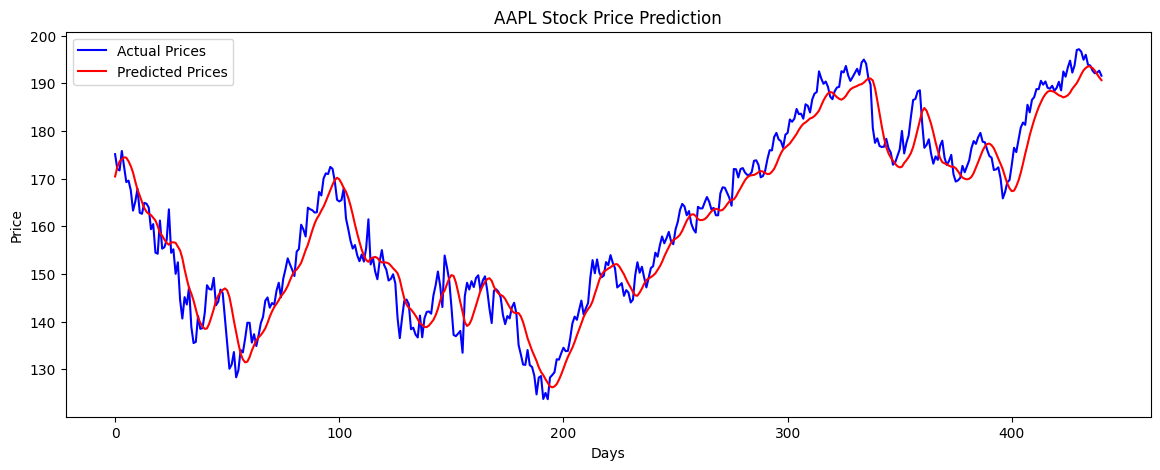

In [77]:
# 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

## 주가예측 모델(GRU)

In [78]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense

In [80]:
# 1. 데이터 수집
ticker = "AAPL" # 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']] # 종가 데이터만 사용

[*********************100%***********************]  1 of 1 completed


In [81]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1)) # 데이터를 0~1 사이로 정규화
scaled_data = scaler.fit_transform(data)

In [82]:
# GRU 모델에 적합한 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [83]:
look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # GRU 입력 형태

In [84]:
# 3. GRU 모델 구성
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    GRU(50),
    Dense(1)
])

In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
# 4. 모델 학습
train_size = int(len(X) * 0.8)  # 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [87]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 [==============================] - 6s 47ms/step - loss: 0.0136 - val_loss: 5.1847e-04
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.6095e-04 - val_loss: 4.9748e-04
Epoch 3/20
56/56 [==============================] - 2s 37ms/step - loss: 1.3902e-04 - val_loss: 4.6176e-04
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3241e-04 - val_loss: 4.7376e-04
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3140e-04 - val_loss: 4.1433e-04
Epoch 6/20
56/56 [==============================] - 2s 38ms/step - loss: 1.2934e-04 - val_loss: 4.2472e-04
Epoch 7/20
56/56 [==============================] - 2s 37ms/step - loss: 1.1920e-04 - val_loss: 3.8799e-04
Epoch 8/20
56/56 [==============================] - 2s 38ms/step - loss: 1.1741e-04 - val_loss: 3.8801e-04
Epoch 9/20
56/56 [==============================] - 2s 37ms/step - loss: 1.1547e-04 - val_loss: 3.7041e-04
Epoch 10/20
56/56 [======================

In [88]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # 정규화 복원

In [89]:
# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

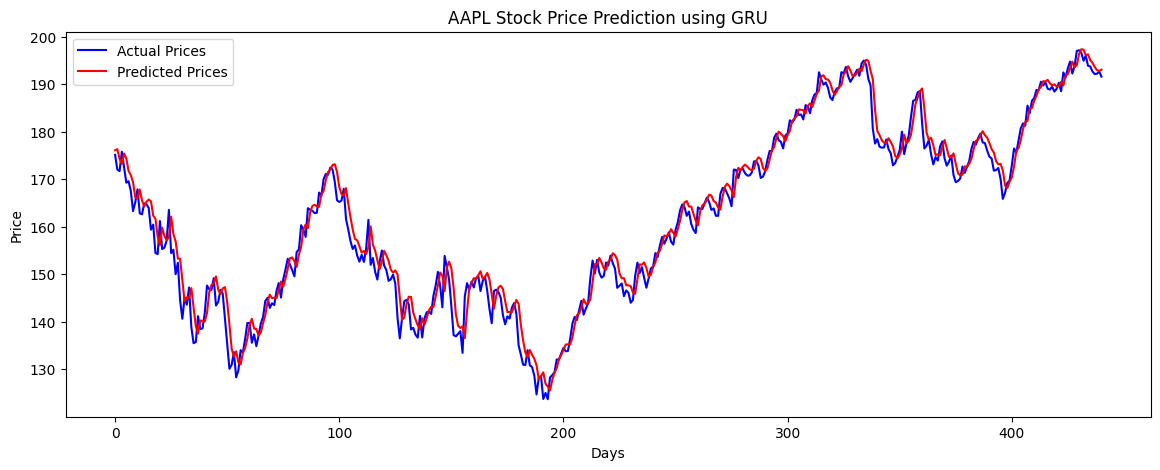

In [90]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction using GRU')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()